# 5. Splittings to CO$_2$ density, to Pressure, to Depth (+MC)
- Once you have your corrected splittings from step 1-4, you need to convert them into a densimeter developed for your instrument
- If you have a densimeter, you can either contact me and I can add it to the function, or you can write your own function using our function as a template
- Data is here: https://github.com/PennyWieser/DiadFit/blob/main/docs/Examples/Example1b_CO2_Fluid_Inclusions/Calibration_fitting_w_sec_phases.xlsx

In [1]:
import CoolProp.CoolProp as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
import os
pf.__version__

'0.0.59'

In [2]:
# Setting plotting parameters
plt.rcParams["font.family"] = 'Times New Roman'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1 
plt.rcParams["xtick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 6 # Sets length of ticks
plt.rcParams["xtick.minor.size"] = 3 # Sets length of ticks
plt.rcParams["ytick.minor.size"] = 3 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels
plt.rcParams["pdf.fonttype"]=42
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams["legend.fancybox"]=False

In [3]:
MasterFolder=r"C:\Users\charl\Documents\Data projects\Data\Fogo_FI"
DayFolder=MasterFolder + "\FG04_FI_May3123"

if not os.path.exists(MasterFolder + '\FIGS'):
    os.mkdir(MasterFolder +'\FIGS')

if not os.path.exists(MasterFolder + '\OUTPUT'):
    os.mkdir(MasterFolder +'\OUTPUT')

figpath=MasterFolder +'\FIGS'
path=MasterFolder +'\OUTPUT'

## Read in data

In [5]:
files = os.listdir(path)
files_xls = [f for f in files if "FI_fitting_w_sec_phases" in f]
fg_fi=pd.DataFrame()
for f in files_xls:
    sheets = pd.read_excel(path+'/'+f, 'Sheet1')
    fg_fi = pd.concat([fg_fi,sheets],axis=0)
    fg_fi=fg_fi.drop(columns=['Unnamed: 0','Unnamed: 0.1'])
    fg_fi['T_K']=1150+273.15
    fg_fi=fg_fi.reset_index(drop=True)

fg_fi.to_excel(path+'/'+'fg_fi.xlsx')
df=fg_fi.copy()
df

,Corrected_Splitting,Corr_Split+1σ,Corr_Split-1σ,Corr_Split_1σ_val,filename_x,Splitting,Split_err_abs,Split_err_quadrature,Diad1_Combofit_Cent,Diad1_cent_err,...,24hr_time,sec since midnight,Spectral Center,filename,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,T_K
0,104.032194,104.050476,104.013912,0.018282,FG04-A13-10_CRR_DiadFit,104.274265,0.024254,0.018309,1283.412069,0.016659,...,11:39:41 AM\n,41981.0,1325.004,FG04-A13-10.txt,1093.213280,878.396046,45.042662,PseudoVoigtModel,1.470651,1423.15
1,104.321622,104.346327,104.296917,0.024705,FG04-A13-13_CRR_DiadFit,104.565873,0.034019,0.024752,1282.819198,0.021133,...,12:00:12 PM\n,43212.0,1325.004,NaN,NaN,NaN,NaN,NaN,NaN,1423.15
2,104.113547,104.118908,104.108187,0.005360,FG04-A13-3_CRR_DiadFit,104.352379,0.005316,0.005316,1283.238125,0.005316,...,10:57:30 AM\n,39450.0,1325.004,FG04-A13-3.txt,1091.437879,1023.229396,55.543749,PseudoVoigtModel,0.312451,1423.15
3,104.201441,104.210632,104.192250,0.009191,FG04-A13-5_CRR_DiadFit,104.441640,0.012657,0.009179,1283.020212,0.007771,...,11:11:13 AM\n,40273.0,1325.004,FG04-A13-5.txt,1091.149562,1096.347087,57.725131,PseudoVoigtModel,0.401790,1423.15
4,103.795584,103.937166,103.654003,0.141582,FG04-A13-9,104.036540,0.174159,0.141909,1283.911074,0.136941,...,11:32:18 AM\n,41538.0,1325.004,NaN,NaN,NaN,NaN,NaN,NaN,1423.15
5,103.346210,103.354971,103.337449,0.008761,FG04-A16-1_CRR_DiadFit,103.595025,0.012218,0.008750,1285.111547,0.007091,...,2:06:34 PM\n,50794.0,1325.004,NaN,NaN,NaN,NaN,NaN,NaN,1423.15
6,103.654953,103.669936,103.639971,0.014983,FG04-A16-2_CRR_DiadFit,103.904820,0.021142,0.015000,1284.408894,0.011440,...,2:14:51 PM\n,51291.0,1325.004,FG04-A16-2.txt,1094.147682,2292.008907,129.039478,PseudoVoigtModel,1.631101,1423.15
7,103.441352,103.453037,103.429667,0.011685,FG04-A16-3_CRR_DiadFit,103.690911,0.016104,0.011689,1284.850103,0.009919,...,2:20:41 PM\n,51641.0,1325.004,NaN,NaN,NaN,NaN,NaN,NaN,1423.15
8,104.002628,104.064072,103.941183,0.061445,FG04-A16-7_CRR_DiadFit,104.254408,0.077483,0.061589,1283.718100,0.058633,...,2:48:22 PM\n,53302.0,1325.004,NaN,NaN,NaN,NaN,NaN,NaN,1423.15
9,103.313486,103.339870,103.287103,0.026384,FG04-A16-8,103.563793,0.035435,0.026437,1285.200733,0.023679,...,2:55:38 PM\n,53738.0,1325.004,FG04-A16-8.txt,1093.990681,1501.724331,83.545351,PseudoVoigtModel,5.031097,1423.15


## Convert splitting to density
- Here we use the Cornell densimeter developed by DeVitre et al. (2021), and use the supercritical arguement, as analyses were done at 37C. 

In [25]:
densities=pf.calculate_density_cornell(temp='SupCrit', Split=df['Corrected_Splitting'])
densities_minerr=pf.calculate_density_cornell(temp='SupCrit', Split=df['Corrected_Splitting']-df['Split_err_abs'])
densities_pluserr=pf.calculate_density_cornell(temp='SupCrit', Split=df['Corrected_Splitting']+df['Split_err_abs'])

densities.head()

,Preferred D,in range,Notes,LowD_RT,HighD_RT,LowD_SC,MedD_SC,HighD_SC,Temperature,Splitting,Preferred_D
0,0.630115,Y,"SupCrit, Med density",0.542809,0.608366,0.552093,0.630115,0.629126,SupCrit,104.188362,NaN
1,0.619072,Y,"SupCrit, Med density",0.534253,0.595875,0.543473,0.619072,0.616925,SupCrit,104.165440,NaN
2,0.611544,Y,"SupCrit, Med density",0.528414,0.587263,0.537591,0.611544,0.608507,SupCrit,104.149797,NaN
3,0.605399,Y,"SupCrit, Med density",0.523645,0.580174,0.532786,0.605399,0.601576,SupCrit,104.137019,NaN
4,0.593600,Y,"SupCrit, Med density",0.514475,0.566413,0.523548,0.593600,0.588112,SupCrit,104.112453,NaN


## Calculate pressures using different equation of states and entrapment temps

### Using Span and Wanger, 1996 at 1150C

In [26]:
Pressure_SW96=pf.calculate_P_for_rho_T(T_K=1250+273.15,
                CO2_dens_gcm3=densities['Preferred D'],
                 EOS='SW96')
Pressure_SW96.head()

,P_kbar,P_MPa,T_K,CO2_dens_gcm3
0,3.358158,335.815794,1523.15,0.630115
1,3.253367,325.336705,1523.15,0.619072
2,3.183353,318.335316,1523.15,0.611544
3,3.127043,312.704301,1523.15,0.605399
4,3.020996,302.099597,1523.15,0.593600


### Using Sterner and Pitzer, 1994 at 1150 C

In [27]:
Pressure_SP94=pf.calculate_P_for_rho_T(T_K=1250+273.15,
                CO2_dens_gcm3=densities['Preferred D'],
                 EOS='SP94')
Pressure_SP94.head()

,P_kbar,P_MPa,T_K,CO2_dens_gcm3
0,3.451835,345.183512,1523.15,0.630115
1,3.346264,334.626431,1523.15,0.619072
2,3.275575,327.557505,1523.15,0.611544
3,3.218630,321.863027,1523.15,0.605399
4,3.111163,311.116277,1523.15,0.593600


## Lets convert these into depths in the crust
- DiadFit has various options for calculating depth, using the function 'convert_pressure_to_depth' 
1. Constant density
2. two-step density profile
3. three-step density profile
4. Crustal density models: 'ryan_lerner', 'mavko_debari', 'hill_zucca', 'prezzi,'rasmussen'

### We can compare the different options for converting density to depth here

In [28]:
# Make an array of pressures that is equally spaced from surface down to Moho
P_kbar_lin=np.linspace(0, 10, 100)

Depth_2700=pf.convert_pressure_to_depth(P_kbar=P_kbar_lin,
                crust_dens_kgm3=2700)

Depth_ryan_lerner=pf.convert_pressure_to_depth(P_kbar=P_kbar_lin,
                model='ryan_lerner')

Depth_Ramussen=pf.convert_pressure_to_depth(P_kbar=P_kbar_lin,
                model='rasmussen')

Depth_HZ=pf.convert_pressure_to_depth(P_kbar=P_kbar_lin,
                model='hill_zucca')

Depth_MD=pf.convert_pressure_to_depth(P_kbar=P_kbar_lin,
                model='mavko_debari')

Depth_prezzi=pf.convert_pressure_to_depth(P_kbar=P_kbar_lin,
                model='prezzi')

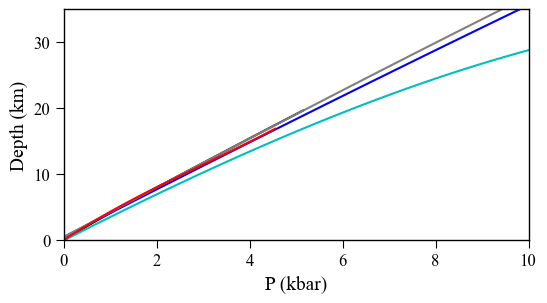

In [29]:
fig, (ax1) = plt.subplots(1, 1, figsize=(6,3), sharey=True)

ax1.plot(P_kbar_lin, Depth_Ramussen, '-k')
ax1.plot(P_kbar_lin, Depth_HZ, '-c')
ax1.plot(P_kbar_lin, Depth_MD, '-b')
ax1.plot(P_kbar_lin, Depth_prezzi, '-', color='grey')
ax1.plot(P_kbar_lin, Depth_ryan_lerner, '-r')
ax1.set_xlim([0, 10])
ax1.set_ylim([0, 35])
ax1.set_xlabel('P (kbar)')
ax1.set_ylabel('Depth (km)')
fig.savefig('Diff_Profiles.png', dpi=300, bbox_inches='tight')

#### Constant crustal density of 2700 kg/m3

In [30]:
Depth_constant_rho=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'],
                crust_dens_kgm3=2700)
# Lets append this onto the dataframe above
Pressure_SW96['Depth_km_constantrho']=Depth_constant_rho
Pressure_SW96.head()

,P_kbar,P_MPa,T_K,CO2_dens_gcm3,Depth_km_constantrho
0,3.358158,335.815794,1523.15,0.630115,12.678514
1,3.253367,325.336705,1523.15,0.619072,12.282882
2,3.183353,318.335316,1523.15,0.611544,12.018549
3,3.127043,312.704301,1523.15,0.605399,11.805954
4,3.020996,302.099597,1523.15,0.593600,11.405580


#### Two-step density, 2800 kg/m3 above moho at 17km, 3100 kg/m3 below

In [31]:
Depth_two_step=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'],
                model='two-step', rho1=2800, rho2=3300, d1=13)
# Lets append this onto the dataframe above
Pressure_SW96['Depth_km_2step']=Depth_two_step
Pressure_SW96.head()

,P_kbar,P_MPa,T_K,CO2_dens_gcm3,Depth_km_constantrho,Depth_km_2step
0,3.358158,335.815794,1523.15,0.630115,12.678514,12.225710
1,3.253367,325.336705,1523.15,0.619072,12.282882,11.844208
2,3.183353,318.335316,1523.15,0.611544,12.018549,11.589315
3,3.127043,312.704301,1523.15,0.605399,11.805954,11.384313
4,3.020996,302.099597,1523.15,0.593600,11.405580,10.998238


#### Three step, 2400 kg/m3 down to 4km, 2800 down to 13 km, 3300 below that

In [32]:
Depth_three_step=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'],
model='three-step', rho1=2400, rho2=2800, rho3=3300, d1=4, d2=13)
# Lets append this onto the dataframe above
Pressure_SW96['Depth_km_3step']=Depth_three_step
Pressure_SW96.head()

,P_kbar,P_MPa,T_K,CO2_dens_gcm3,Depth_km_constantrho,Depth_km_2step,Depth_km_3step
0,3.358158,335.815794,1523.15,0.630115,12.678514,12.225710,12.797138
1,3.253367,325.336705,1523.15,0.619072,12.282882,11.844208,12.415637
2,3.183353,318.335316,1523.15,0.611544,12.018549,11.589315,12.160744
3,3.127043,312.704301,1523.15,0.605399,11.805954,11.384313,11.955741
4,3.020996,302.099597,1523.15,0.593600,11.405580,10.998238,11.569666


#### Using the density model of ryan-lerner. 

In [33]:
Depth_RL=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'],
model='ryan_lerner')
# Lets append this onto the dataframe above
Pressure_SW96['Depth_km_RL']=Depth_RL
Pressure_SW96.head()

,P_kbar,P_MPa,T_K,CO2_dens_gcm3,Depth_km_constantrho,Depth_km_2step,Depth_km_3step,Depth_km_RL
0,3.358158,335.815794,1523.15,0.630115,12.678514,12.225710,12.797138,12.674695
1,3.253367,325.336705,1523.15,0.619072,12.282882,11.844208,12.415637,12.317511
2,3.183353,318.335316,1523.15,0.611544,12.018549,11.589315,12.160744,12.079274
3,3.127043,312.704301,1523.15,0.605399,11.805954,11.384313,11.955741,11.887828
4,3.020996,302.099597,1523.15,0.593600,11.405580,10.998238,11.569666,11.527492


## Propagating errors in calculated pressure
- The main source of random error are the CO$_2$ density and how well you have determined it using microthermometry or Raman spectroscopy
- Entrapment temp could be a random error, or systematic, depending on how well temperature is constrained in your system
- The crustal density and/or choice of density profile is more likely a systematic error. 

### Lets propagate uncertainty in just entrapment temperature to start with
- We say we have a +-50K absolute uncertainty in temperature, distributed normally
- An error of +-0.01 g/cm3 in density (also distributed normally)
- An error in crustal density of 100 kg/m3 around a fixed value of 2700 kg/m3
- This function returns the average of each simulation for default N=1000 simulations.
- It also returns a dataframe of all simulations (e.g. 1000*# of fluid inclusions)
- This function also shows the distribution for one fluid inclusion, here fig_i=0 means it plots the first one, you can change this. 

working on sample number 0
working on sample number 20
working on sample number 40
working on sample number 60
working on sample number 80
working on sample number 100
working on sample number 120
working on sample number 140
working on sample number 160
working on sample number 180
working on sample number 200
working on sample number 220
working on sample number 240
working on sample number 260
working on sample number 280
working on sample number 300
working on sample number 320
working on sample number 340


,Filename,CO2_dens_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3,T_K,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS
0,03 FG04-A1-reg1-1_r1_CRR_DiadFit,0.630115,12.225710,3.358158,3.352093,3.339251,0.227880,12.191234,12.156876,0.804855,50,0.02,0.0,1523.15,0.630115,two-step,None,SW96
1,05 FG04-A1-reg1-1_r2_CRR_DiadFit,0.619072,11.844208,3.253367,3.252772,3.242146,0.226300,11.836416,11.803356,0.811174,50,0.02,0.0,1523.15,0.619072,two-step,None,SW96
2,06 FG04-A1-reg1-1_r3_CRR_DiadFit,0.611544,11.589315,3.183353,3.179317,3.179364,0.213200,11.572497,11.574791,0.770578,50,0.02,0.0,1523.15,0.611544,two-step,None,SW96
3,08 FG04-A1-reg1-2_r1_CRR_DiadFit,0.605399,11.384313,3.127043,3.139019,3.125991,0.195529,11.427132,11.380481,0.709768,50,0.02,0.0,1523.15,0.605399,two-step,None,SW96
4,10 FG04-A1-reg1-2_r2_CRR_DiadFit,0.593600,10.998238,3.020996,3.012666,3.008978,0.203073,10.967860,10.954485,0.739157,50,0.02,0.0,1523.15,0.593600,two-step,None,SW96


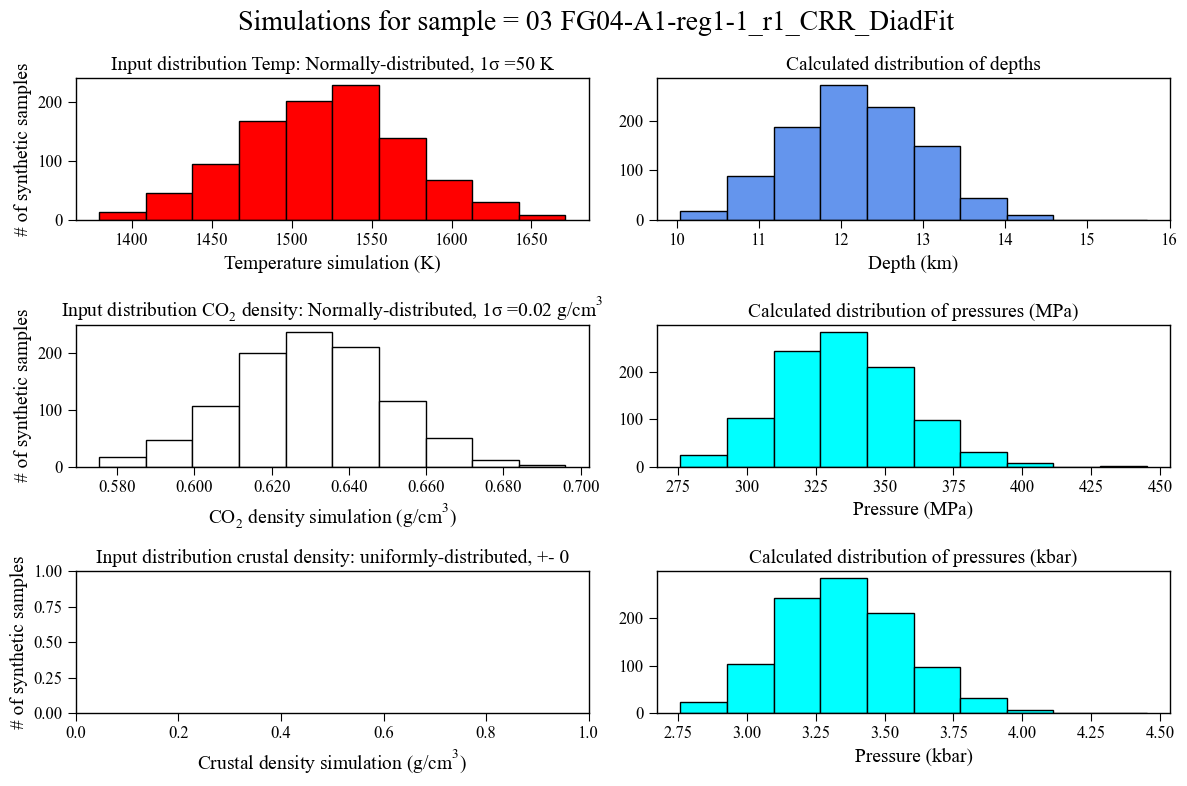

In [34]:
MC_Av_1, MC_All_1, fig=pf.propagate_FI_uncertainty(N_dup=1000,
sample_ID=df['filename_x'],
CO2_dens_gcm3=densities['Preferred D'], error_CO2_dens=0.02,
error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
T_K=1250+273.15, error_T_K=50, error_type_T_K='Abs', error_dist_T_K='normal', 
plot_figure=True, fig_i=0, model='two-step', rho1=2800, rho2=3300, d1=13)

MC_Av_1.head()

In [35]:
merged_df = pd.merge(df, MC_Av_1, left_on='filename_x',right_on='Filename')
merged_df.insert(1, 'filename_stripped', merged_df['Filename'].str.replace('_CRR_DiadFit', ''))
merged_df.to_excel(path+'/'+'FG_fi_merged.xlsx')
merged_df

,filename_x,filename_stripped,Corrected_Splitting,Splitting,Split_err_abs,Split_err_quadrature,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,...,Med_MC_D_km,std_dev_MC_D_km,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3,T_K_y,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS
0,03 FG04-A1-reg1-1_r1_CRR_DiadFit,03 FG04-A1-reg1-1_r1,104.188362,104.437739,0.01025,0.007420,1283.116582,0.00625,436.217868,1283.116582,...,12.156876,0.804855,50,0.02,0.0,1523.15,0.630115,two-step,None,SW96
1,05 FG04-A1-reg1-1_r2_CRR_DiadFit,05 FG04-A1-reg1-1_r2,104.165440,104.415255,0.01076,0.007662,1283.135141,0.00602,472.377774,1283.135141,...,11.803356,0.811174,50,0.02,0.0,1523.15,0.619072,two-step,None,SW96
2,06 FG04-A1-reg1-1_r3_CRR_DiadFit,06 FG04-A1-reg1-1_r3,104.149797,104.399736,NaN,NaN,1283.148117,NaN,490.834962,1283.148117,...,11.574791,0.770578,50,0.02,0.0,1523.15,0.611544,two-step,None,SW96
3,08 FG04-A1-reg1-2_r1_CRR_DiadFit,08 FG04-A1-reg1-2_r1,104.137019,104.387579,NaN,NaN,1283.200978,NaN,220.398084,1283.200978,...,11.380481,0.709768,50,0.02,0.0,1523.15,0.605399,two-step,None,SW96
4,10 FG04-A1-reg1-2_r2_CRR_DiadFit,10 FG04-A1-reg1-2_r2,104.112453,104.363436,0.01171,0.008283,1283.218485,0.00600,290.402480,1283.218485,...,10.954485,0.739157,50,0.02,0.0,1523.15,0.593600,two-step,None,SW96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,FG04-A2-reg1-1-20mw_CRR_DiadFit,FG04-A2-reg1-1-20mw,104.186762,104.435252,NaN,NaN,1283.115217,NaN,5029.528379,1283.115267,...,12.195446,0.820222,50,0.02,0.0,1523.15,0.629344,two-step,None,SW96
347,FG04-A2-reg1-1-20mwdown_CRR_DiadFit,FG04-A2-reg1-1-20mwdown,104.183032,104.431855,NaN,NaN,1283.113874,NaN,5124.002274,1283.113924,...,12.163953,0.796295,50,0.02,0.0,1523.15,0.627546,two-step,None,SW96
348,FG04-A2-reg1-1-5mw_CRR_DiadFit,FG04-A2-reg1-1-5mw,104.204350,104.452669,NaN,NaN,1283.081446,NaN,1253.112048,1283.081496,...,12.478865,0.807098,50,0.02,0.0,1523.15,0.637825,two-step,None,SW96
349,FG04-A2-reg1-1-5mwdown_CRR_DiadFit,FG04-A2-reg1-1-5mwdown,104.212438,104.461680,NaN,NaN,1283.068145,NaN,1301.068380,1283.068195,...,12.619510,0.821740,50,0.02,0.0,1523.15,0.641727,two-step,None,SW96


In [36]:
tags=pd.read_excel(path+'/'+'FG_fi_codes.xlsx',sheet_name='Full')
merged_df_wtags=pd.merge(merged_df,tags,on='filename_stripped',how='left')

merged_df_wtags.to_clipboard(excel=True)
merged_df_wtags.to_excel(path+'/'+'FG_fi_mergedwtags.xlsx')
merged_df_wtags

,filename_x,filename_stripped,Corrected_Splitting,Splitting,Split_err_abs,Split_err_quadrature,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,...,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS,Tag,Tmelt,Thomog_low,Thomog_high,Side,distance from top
0,03 FG04-A1-reg1-1_r1_CRR_DiadFit,03 FG04-A1-reg1-1_r1,104.188362,104.437739,0.01025,0.007420,1283.116582,0.00625,436.217868,1283.116582,...,0.630115,two-step,None,SW96,A101,-56.3,29.5,29.6,ts,21.0
1,05 FG04-A1-reg1-1_r2_CRR_DiadFit,05 FG04-A1-reg1-1_r2,104.165440,104.415255,0.01076,0.007662,1283.135141,0.00602,472.377774,1283.135141,...,0.619072,two-step,None,SW96,A101,-56.3,29.5,29.6,ts,21.0
2,06 FG04-A1-reg1-1_r3_CRR_DiadFit,06 FG04-A1-reg1-1_r3,104.149797,104.399736,NaN,NaN,1283.148117,NaN,490.834962,1283.148117,...,0.611544,two-step,None,SW96,A101,-56.3,29.5,29.6,ts,21.0
3,08 FG04-A1-reg1-2_r1_CRR_DiadFit,08 FG04-A1-reg1-2_r1,104.137019,104.387579,NaN,NaN,1283.200978,NaN,220.398084,1283.200978,...,0.605399,two-step,None,SW96,A102,-56.3,29.6,29.7,ts,25.0
4,10 FG04-A1-reg1-2_r2_CRR_DiadFit,10 FG04-A1-reg1-2_r2,104.112453,104.363436,0.01171,0.008283,1283.218485,0.00600,290.402480,1283.218485,...,0.593600,two-step,None,SW96,A102,-56.3,29.6,29.7,ts,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,FG04-A2-reg1-1-20mw_CRR_DiadFit,FG04-A2-reg1-1-20mw,104.186762,104.435252,NaN,NaN,1283.115217,NaN,5029.528379,1283.115267,...,0.629344,two-step,None,SW96,A201,-56.3,NaN,NaN,f,NaN
347,FG04-A2-reg1-1-20mwdown_CRR_DiadFit,FG04-A2-reg1-1-20mwdown,104.183032,104.431855,NaN,NaN,1283.113874,NaN,5124.002274,1283.113924,...,0.627546,two-step,None,SW96,A201,-56.3,NaN,NaN,f,NaN
348,FG04-A2-reg1-1-5mw_CRR_DiadFit,FG04-A2-reg1-1-5mw,104.204350,104.452669,NaN,NaN,1283.081446,NaN,1253.112048,1283.081496,...,0.637825,two-step,None,SW96,A201,-56.3,NaN,NaN,f,NaN
349,FG04-A2-reg1-1-5mwdown_CRR_DiadFit,FG04-A2-reg1-1-5mwdown,104.212438,104.461680,NaN,NaN,1283.068145,NaN,1301.068380,1283.068195,...,0.641727,two-step,None,SW96,A201,-56.3,NaN,NaN,f,NaN


In [84]:
topside_df=merged_df_wtags[~(merged_df_wtags['Side']=='f')&(merged_df_wtags['power (mW)'].between(0,7))&(merged_df_wtags['Spectral Center'].between(1323,1326))]

topside_df.to_clipboard(excel=True)#[topside_df['Tag']=='A101']

(102.0, 106.0)

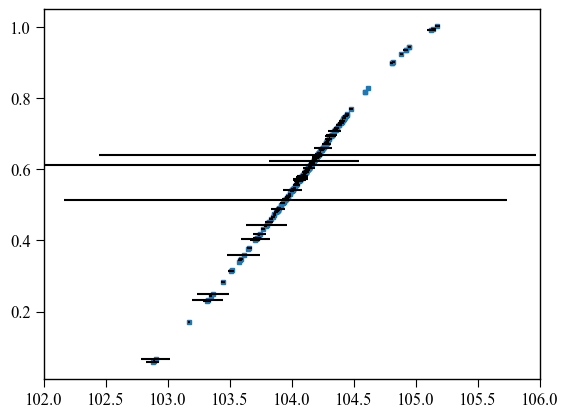

In [83]:
testdf=topside_df#[merged_df_wtags['Day']==24]
plt.errorbar(testdf['Corrected_Splitting'],testdf['CO2_dens_gcm3'],xerr=testdf['Split_err_abs'],
                marker='s',linestyle='',markersize=3,ecolor='k',barsabove=True)
plt.xlim([102,106])

## Establish the microthermometry calibration line

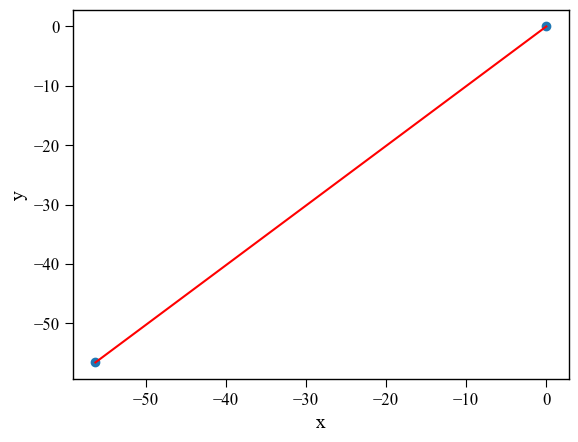

In [146]:
from scipy.stats import linregress
import pickle
# Your data points
x = np.array([-56.3,0.0])
y = np.array([-56.6,0.0])

# Fit a linear regression model to your data
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Store the model coefficients in a dictionary
model = {'slope': slope, 'intercept': intercept}

# Store the model in a pickle file
with open('linkam_cali_reg.pkl', 'wb') as f:
    pickle.dump(model, f)

    

# Plot the data along with the regression line
plt.scatter(x, y)
plt.plot(x, slope*x + intercept, color='red')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

## Calculate densities from Thomog where available

In [147]:
# Load the model from the pickle file
with open('linkam_cali_reg.pkl', 'rb') as f:
    model = pickle.load(f)

# Predict new values
def correct_Th(*,model,Th):
    Th_array = np.array(Th)
    T_cal = model['slope'] * Th_array + model['intercept']
    return T_cal

In [148]:
Tlow=merged_df_wtags['Thomog_low']
Thigh=merged_df_wtags['Thomog_high']
Tmelt=merged_df_wtags['Tmelt']
sample_ID=merged_df_wtags['filename_stripped']
Ts=[Tlow,Thigh,Tmelt]

Tcorr_dict={}
for T in Ts:
    name=T.name
    T_corr=correct_Th(model=model,Th=T)
    Tcorr_dict[name]=T_corr

rho_dict={}
for T in Tcorr_dict:
    if 'melt' not in T:
        rho=pf.calculate_CO2_density_homog_T(T_h_C=Tcorr_dict[T], Sample_ID=sample_ID,
                                    homog_to='L', EOS='SW96')
        rho_dict[T]=rho
#display(rho_dict)
rho_merge=pd.merge(rho_dict['Thomog_low'],rho_dict['Thomog_high'],on='Sample_ID',suffixes=['low','high'])

rho_merge['Mean_Bulk_gcm3']=rho_merge[['Bulk_gcm3low', 'Bulk_gcm3high']].mean(axis=1)
rho_merge['Std_Bulk_gcm3']=rho_merge[['Bulk_gcm3low', 'Bulk_gcm3high']].std(axis=1)

display(rho_merge)

,Bulk_gcm3low,Liq_gcm3low,Gas_gcm3low,T_h_Clow,homog_tolow,Sample_ID,Bulk_gcm3high,Liq_gcm3high,Gas_gcm3high,T_h_Chigh,homog_tohigh,Mean_Bulk_gcm3,Std_Bulk_gcm3
0,0.607469,0.607469,0.331856,29.657194,L,03 FG04-A1-reg1-1_r1,0.603567,0.603567,0.335447,29.757726,L,0.605518,0.002759
1,0.607469,0.607469,0.331856,29.657194,L,05 FG04-A1-reg1-1_r2,0.603567,0.603567,0.335447,29.757726,L,0.605518,0.002759
2,0.607469,0.607469,0.331856,29.657194,L,06 FG04-A1-reg1-1_r3,0.603567,0.603567,0.335447,29.757726,L,0.605518,0.002759
3,0.603567,0.603567,0.335447,29.757726,L,08 FG04-A1-reg1-2_r1,0.599461,0.599461,0.339243,29.858259,L,0.601514,0.002903
4,0.603567,0.603567,0.335447,29.757726,L,10 FG04-A1-reg1-2_r2,0.599461,0.599461,0.339243,29.858259,L,0.601514,0.002903
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,NaN,NaN,NaN,NaN,L,FG04-A6-1-2,NaN,NaN,NaN,NaN,L,NaN,NaN
164,NaN,NaN,NaN,NaN,L,FG04-A6-1-3,NaN,NaN,NaN,NaN,L,NaN,NaN
165,NaN,NaN,NaN,NaN,L,FG04-A6-3-2,NaN,NaN,NaN,NaN,L,NaN,NaN
166,NaN,NaN,NaN,NaN,L,FG04-A6-3-3,NaN,NaN,NaN,NaN,L,NaN,NaN


## Merge densities from microtherm into main frame

In [149]:
totaldf=pd.merge(merged_df_wtags,rho_merge[['Sample_ID','Mean_Bulk_gcm3','Std_Bulk_gcm3']],left_on='filename_stripped', right_on='Sample_ID', how='inner')
totaldf=totaldf.drop(columns=['filename_x','Sample_ID','filename_y'])
totaldf.columns

Index(['filename_stripped', 'Tag', 'Tmelt', 'Thomog_low', 'Thomog_high',
       'Side', 'distance from top', 'Corrected_Splitting', 'Splitting',
       'Split_err_abs', 'Split_err_quadrature', 'Diad1_Combofit_Cent',
       'Diad1_cent_err', 'Diad1_Combofit_Height', 'Diad1_Voigt_Cent',
       'Diad1_Voigt_Area', 'Diad1_Voigt_Sigma', 'Diad1_Residual',
       'Diad1_Prop_Lor', 'Diad1_fwhm', 'Diad1_refit', 'Diad2_Combofit_Cent',
       'Diad2_cent_err', 'Diad2_Combofit_Height', 'Diad2_Voigt_Cent',
       'Diad2_Voigt_Area', 'Diad2_Voigt_Sigma', 'Diad2_Voigt_Gamma',
       'Diad2_Residual', 'Diad2_Prop_Lor', 'Diad2_fwhm', 'Diad2_refit',
       'HB1_Cent', 'HB1_Area', 'HB1_Sigma', 'HB2_Cent', 'HB2_Area',
       'HB2_Sigma', 'C13_Cent', 'C13_Area', 'C13_Sigma', 'Diad2_Gauss_Cent',
       'Diad2_Gauss_Area', 'Diad2_Gauss_Sigma', 'Diad1_Gauss_Cent',
       'Diad1_Gauss_Area', 'Diad1_Gauss_Sigma', 'name_for_matching',
       'Name_for_Secondary_Phases', 'date', 'Month', 'Day', 'power (mW)',
    

In [150]:
totaldf

,filename_stripped,Tag,Tmelt,Thomog_low,Thomog_high,Side,distance from top,Corrected_Splitting,Splitting,Split_err_abs,...,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3,T_K_y,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS,Mean_Bulk_gcm3,Std_Bulk_gcm3
0,03 FG04-A1-reg1-1_r1,A101,-56.3,29.5,29.6,ts,21.0,104.188362,104.437739,0.010250,...,50,0.02,0.0,1523.15,0.630115,two-step,None,SW96,0.605518,0.002759
1,05 FG04-A1-reg1-1_r2,A101,-56.3,29.5,29.6,ts,21.0,104.165440,104.415255,0.010760,...,50,0.02,0.0,1523.15,0.619072,two-step,None,SW96,0.605518,0.002759
2,06 FG04-A1-reg1-1_r3,A101,-56.3,29.5,29.6,ts,21.0,104.149797,104.399736,NaN,...,50,0.02,0.0,1523.15,0.611544,two-step,None,SW96,0.605518,0.002759
3,08 FG04-A1-reg1-2_r1,A102,-56.3,29.6,29.7,ts,25.0,104.137019,104.387579,NaN,...,50,0.02,0.0,1523.15,0.605399,two-step,None,SW96,0.601514,0.002903
4,10 FG04-A1-reg1-2_r2,A102,-56.3,29.6,29.7,ts,25.0,104.112453,104.363436,0.011710,...,50,0.02,0.0,1523.15,0.593600,two-step,None,SW96,0.601514,0.002903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,FG04-A6-1-2,A601,NaN,NaN,NaN,NaN,NaN,104.421763,104.680136,0.002910,...,50,0.02,0.0,1523.15,0.744300,two-step,None,SW96,NaN,NaN
164,FG04-A6-1-3,A601,NaN,NaN,NaN,NaN,NaN,104.417491,104.676571,NaN,...,50,0.02,0.0,1523.15,0.742341,two-step,None,SW96,NaN,NaN
165,FG04-A6-3-2,A603,NaN,NaN,NaN,NaN,NaN,104.408204,104.671756,0.002528,...,50,0.02,0.0,1523.15,0.738061,two-step,None,SW96,NaN,NaN
166,FG04-A6-3-3,A603,NaN,NaN,NaN,NaN,NaN,104.420025,104.683909,NaN,...,50,0.02,0.0,1523.15,0.743504,two-step,None,SW96,NaN,NaN


Text(0, 0.5, 'frequency')

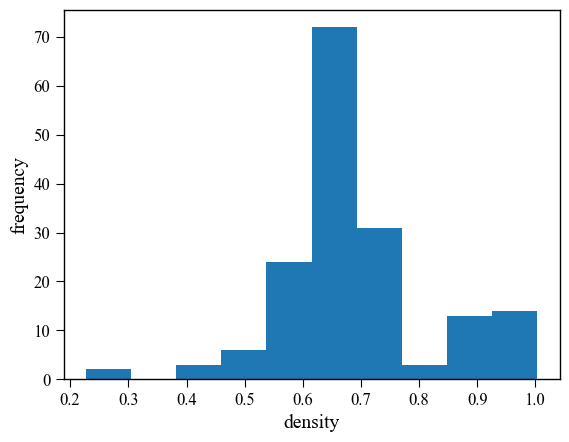

In [151]:
plt.hist(totaldf['CO2_dens_gcm3'])
plt.xlabel("density")
plt.ylabel("frequency")

Text(0, 0.5, 'rho')

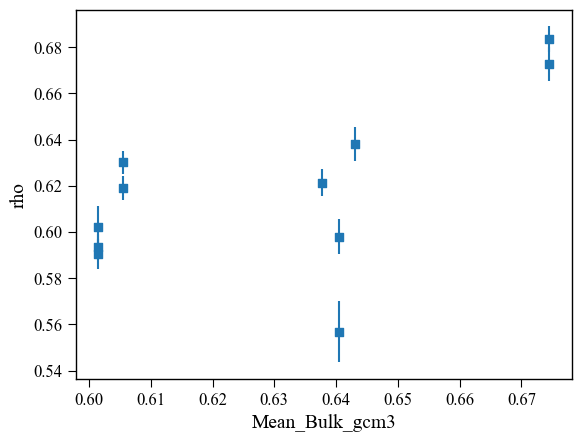

In [152]:
densities=pf.calculate_density_cornell(temp='SupCrit', Split=totaldf['Corrected_Splitting'])
densities_minerr=pf.calculate_density_cornell(temp='SupCrit', Split=totaldf['Corrected_Splitting']-totaldf['Split_err_abs'])
densities_pluserr=pf.calculate_density_cornell(temp='SupCrit', Split=totaldf['Corrected_Splitting']+totaldf['Split_err_abs'])

totaldf['rho_corr']=densities['Preferred D']
totaldf['rho_corr_min']=densities_minerr['Preferred D']
totaldf['rho_corr_max']=densities_pluserr['Preferred D']
totaldf['rhoerr_fiterr']=totaldf[['rho_corr_min', 'rho_corr_max','rho_corr']].std(axis=1)

df=totaldf.copy()
filter=(df['Day']==11)&~(df['filename_stripped'].str.contains("ne"))&(df['power (mW)'].between(4,6))&(df['rho_corr_min']!=0)
df=df[filter]
plt.scatter(df['Mean_Bulk_gcm3'],df['rho_corr'],marker='s')
# plt.scatter(df['Mean_Bulk_gcm3'],df['rho_corr_min'],marker='v')
# plt.scatter(df['Mean_Bulk_gcm3'],df['rho_corr_max'],marker='^')
plt.errorbar(x=df['Mean_Bulk_gcm3'],y=df['rho_corr'],yerr=df['rhoerr_fiterr'],marker='',linestyle='')
# plt.xlim([0.6,0.68])
# plt.ylim([0.5,0.68])
plt.xlabel('Mean_Bulk_gcm3')
plt.ylabel('rho')

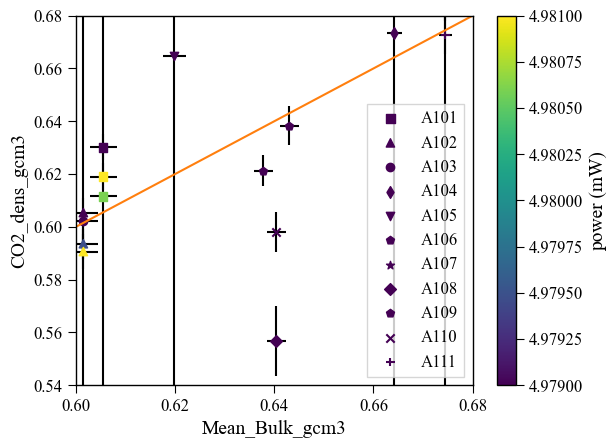

In [153]:
totaldf['Raman-microT']=totaldf['CO2_dens_gcm3']-totaldf['Mean_Bulk_gcm3']
y = 'CO2_dens_gcm3'#'Diad1_Combofit_Height'#'Splitting'#'Raman-microT'#'CO2_dens_gcm3_input'
x = 'Mean_Bulk_gcm3'#'Mean_Bulk_gcm3'
color_column = 'power (mW)'#'Split_err_quadrature'#'sec since midnight'#'distance from top'#'power (mW)'

xerr='Std_Bulk_gcm3'
yerr='rhoerr_fiterr'
df = totaldf.dropna(subset=[x, y, color_column])

filter=(df['Day']==11)&~(df['filename_stripped'].str.contains("ne"))&(df['power (mW)'].between(4,6))#&(df['rho_corr_min']!=0)
df=df[filter]
grouped = df.groupby('Tag')
symbols = ['s', '^', 'o', 'd', 'v', 'p', '*', 'D','p','x','+']

fig, ax = plt.subplots()

for i, (name, group) in enumerate(grouped):
    symbol = symbols[i % len(symbols)]
    filter=(group['Spectral Center'].between(1320,1330))&(group['power (mW)'].between(4,6))#&(group['filename_stripped'].str.contains('ts'))
    if type(yerr)==str:
        yerr_in=group[yerr][filter]
    else:
        yerr_in=0
    if type(xerr)==str:
        xerr_in=group[xerr][filter]
    else:
        xerr_in=0
    ax.errorbar(x=group[x][filter], y=group[y][filter],xerr=xerr_in, yerr=yerr_in, marker='', linestyle='', zorder=-1,ecolor='k')
    sc = ax.scatter(group[x][filter], group[y][filter], label=name, marker=symbol, c=group[color_column][filter], cmap='viridis')

# plt.plot([0.6,0.7],[0.6,0.7])
ax.legend()
plt.xlabel(x)
plt.ylabel(y)
plt.plot([0.6,0.68],[0.6,0.68])
plt.xlim([0.6,0.68])
plt.ylim([0.54,0.68])
cbar = plt.colorbar(sc)
cbar.set_label(color_column)

C:\Users\charl\AppData\Local\Temp\ipykernel_27024\2423504176.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['normalized_color'] = scaler.fit_transform(df[color_column].values.reshape(-1, 1))


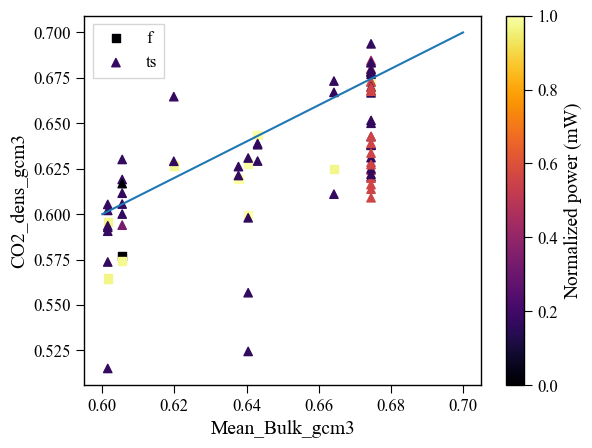

In [154]:
from sklearn.preprocessing import MinMaxScaler

df = totaldf.dropna(subset=[x, y, color_column])

# Normalize color column
scaler = MinMaxScaler()
df['normalized_color'] = scaler.fit_transform(df[color_column].values.reshape(-1, 1))

grouped = df.groupby('Side')
symbols = ['s', '^', 'o', 'd', 'v', 'p', '*', 'D', 'p', 'x', '+']

fig, ax = plt.subplots()

for i, (name, group) in enumerate(grouped):
    symbol = symbols[i % len(symbols)]
    filter = ~(group['Spectral Center'] < 1200) #&(group['filename_stripped'].str.contains('ts'))
    sc = ax.scatter(group[x][filter], group[y][filter], label=name, marker=symbol, c=group['normalized_color'][filter], cmap='inferno')
plt.plot([0.6,0.7],[0.6,0.7])
ax.legend()
plt.xlabel(x)
plt.ylabel(y)
cbar = plt.colorbar(sc)
cbar.set_label('Normalized ' + color_column)


,Filename,Pressure (kbar),Pressure (MPa),Depth (km),input_crust_dens_kgm3,model,MC_T_K,MC_CO2_dens_gcm3
0,FG04-A3-reg1-1_CRR_DiadFit,7.624905,762.490545,25.522984,None,two-step,1484.541255,0.954179
1,FG04-A3-reg1-1_CRR_DiadFit,7.227119,722.711909,24.294224,None,two-step,1429.492997,0.947336
2,FG04-A3-reg1-1_CRR_DiadFit,7.621354,762.135380,25.512012,None,two-step,1471.643443,0.957510
3,FG04-A3-reg1-1_CRR_DiadFit,7.617031,761.703128,25.498660,None,two-step,1469.752470,0.957793
4,FG04-A3-reg1-1_CRR_DiadFit,7.761142,776.114213,25.943818,None,two-step,1433.480366,0.975661


Text(0, 0.5, '# of simulations')

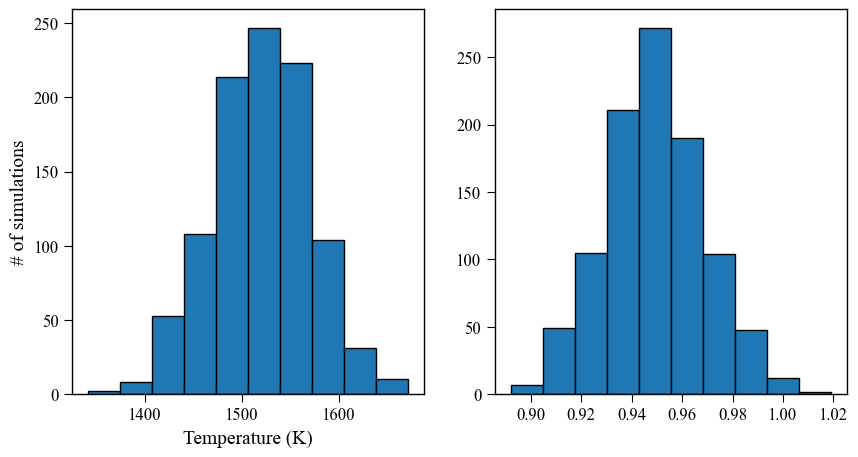

In [155]:
data_FI_59_21=MC_All_1.loc[MC_All_1['Filename']=='FG04-A3-reg1-1_CRR_DiadFit']
display(data_FI_59_21.head())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(data_FI_59_21['MC_T_K'], ec='k')
ax2.hist(data_FI_59_21['MC_CO2_dens_gcm3'], ec='k')
ax1.set_xlabel('Temperature (K)')
ax1.set_ylabel('# of simulations')

Text(0, 0.5, '# of simulations')

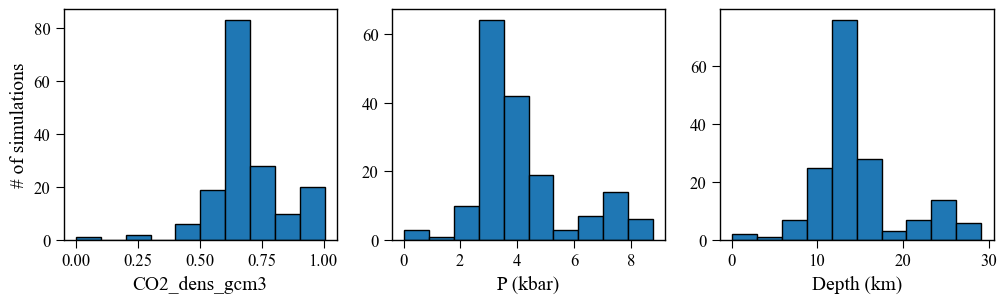

In [156]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(12,3))
ax1.hist(MC_Av_1['CO2_dens_gcm3'], ec='k')
ax2.hist(MC_Av_1['Mean_MC_P_kbar'], ec='k')
ax3.hist(MC_Av_1['Mean_MC_D_km'], ec='k')
ax1.set_xlabel('CO2_dens_gcm3')
ax2.set_xlabel('P (kbar)')
ax3.set_xlabel('Depth (km)')
ax1.set_ylabel('# of simulations')